In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [84]:
# Load the dataset
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')




In [85]:
# Merge data into a single DataFrame
data = pd.merge(orders, items, on='order_id')
data = pd.merge(data, products, on='product_id')
data = pd.merge(data, payments, on='order_id')
data = pd.merge(data, customers, on='customer_id')



In [86]:

# Convert dates to datetime format
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])



In [87]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_approved_at              117586 non-null  object        
 5   order_delivered_carrier_date   116356 non-null  object        
 6   order_delivered_customer_date  115034 non-null  object        
 7   order_estimated_delivery_date  117601 non-null  object        
 8   order_item_id                  117601 non-null  int64         
 9   product_id                     117601 non-null  object        
 10  seller_id                      117601 non-null  object        
 11  

In [89]:
data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245
order_delivered_customer_date,2567
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [90]:
# Handling missing values
data = data.dropna()


In [91]:
# Ensure data types are correct
data['price'] = data['price'].astype(float)
data['freight_value'] = data['freight_value'].astype(float)
data['payment_value'] = data['payment_value'].astype(float)

# Check for duplicates
data = data.drop_duplicates()



<ipython-input-91-84a0898a7c12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(float)
<ipython-input-91-84a0898a7c12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['freight_value'] = data['freight_value'].astype(float)
<ipython-input-91-84a0898a7c12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [92]:
# Add a profit column (assuming we have a 'cost' column, otherwise we'll estimate it)
data['profit'] = data['payment_value'] - (data['price'] + data['freight_value'])

# Preview cleaned data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113390 non-null  object        
 1   customer_id                    113390 non-null  object        
 2   order_status                   113390 non-null  object        
 3   order_purchase_timestamp       113390 non-null  datetime64[ns]
 4   order_approved_at              113390 non-null  object        
 5   order_delivered_carrier_date   113390 non-null  object        
 6   order_delivered_customer_date  113390 non-null  object        
 7   order_estimated_delivery_date  113390 non-null  object        
 8   order_item_id                  113390 non-null  int64         
 9   product_id                     113390 non-null  object        
 10  seller_id                      113390 non-null  object        
 11  shipp

### Revenue and Profit Analysis

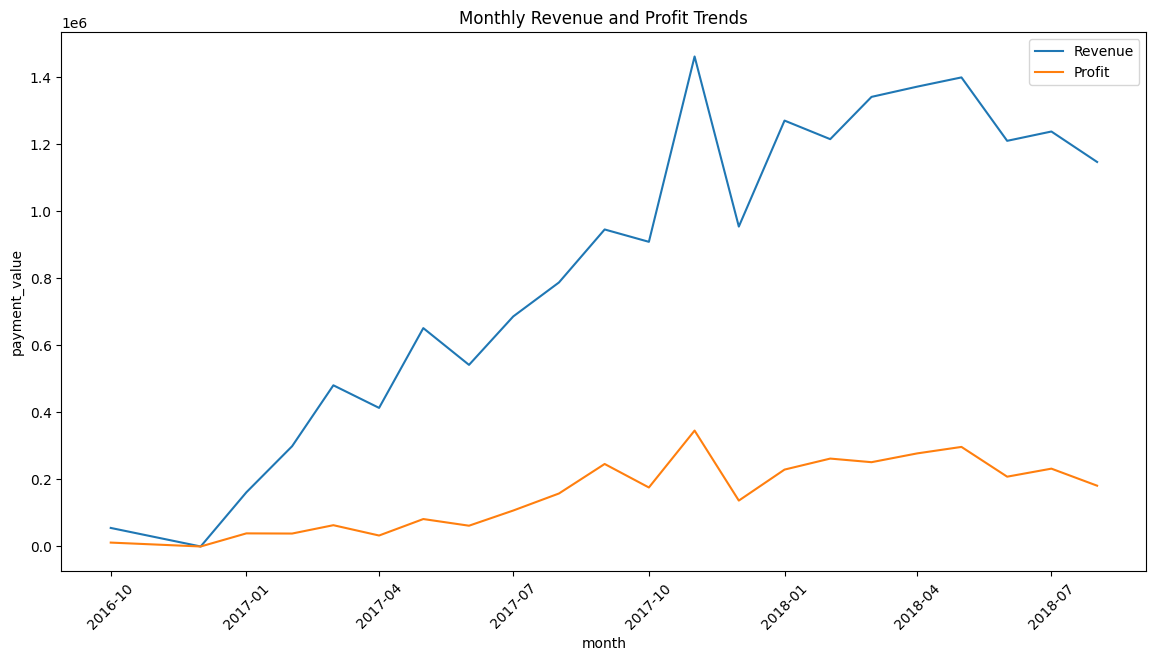

In [93]:
# Ensure the 'month' is of type datetime or a proper period type
monthly_revenue_profit['month'] = monthly_revenue_profit['month'].astype(str)  # Convert to string
monthly_revenue_profit['month'] = pd.to_datetime(monthly_revenue_profit['month'], errors='coerce')  # Convert to datetime

# Ensure 'payment_value' and 'profit' are numeric
monthly_revenue_profit['payment_value'] = pd.to_numeric(monthly_revenue_profit['payment_value'], errors='coerce')
monthly_revenue_profit['profit'] = pd.to_numeric(monthly_revenue_profit['profit'], errors='coerce')

# Drop any rows with NaN values that could not be converted
monthly_revenue_profit = monthly_revenue_profit.dropna()

# Re-plotting the trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='payment_value', data=monthly_revenue_profit, label='Revenue')
sns.lineplot(x='month', y='profit', data=monthly_revenue_profit, label='Profit')
plt.title('Monthly Revenue and Profit Trends')
plt.xticks(rotation=45)
plt.show()


### Top-Contributing Product Categories to Overall Profit

<ipython-input-94-6b10b3e8b4bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.values, y=category_profit.index, palette='viridis')


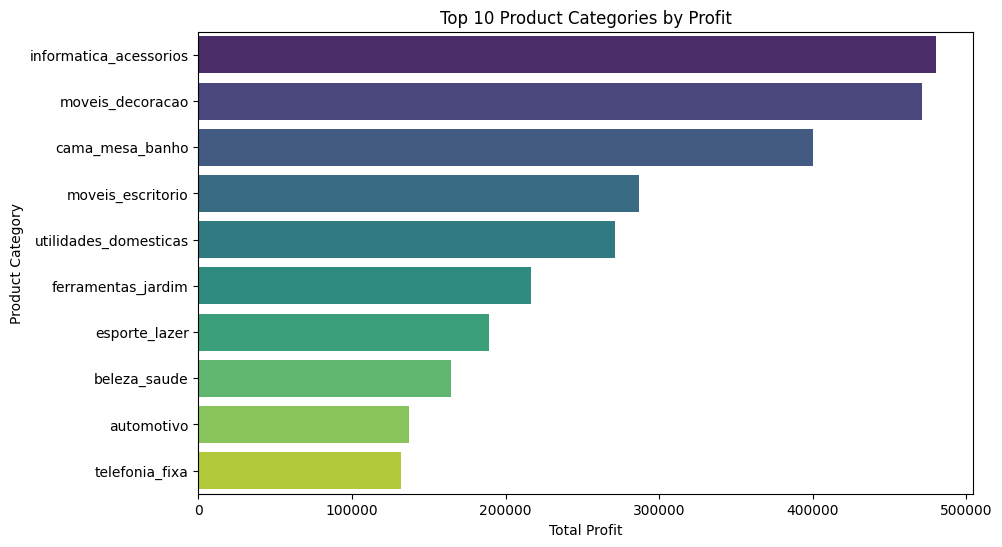

In [94]:
category_profit = data.groupby('product_category_name')['profit'].sum().sort_values(ascending=False).head(10)

# Plotting top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.values, y=category_profit.index, palette='viridis')
plt.title('Top 10 Product Categories by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.show()


## **Profit Margins for Different Product Categories and Sub-Categories**

<ipython-input-95-792909cba15d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit_margin.values, y=category_profit_margin.index, palette='coolwarm')


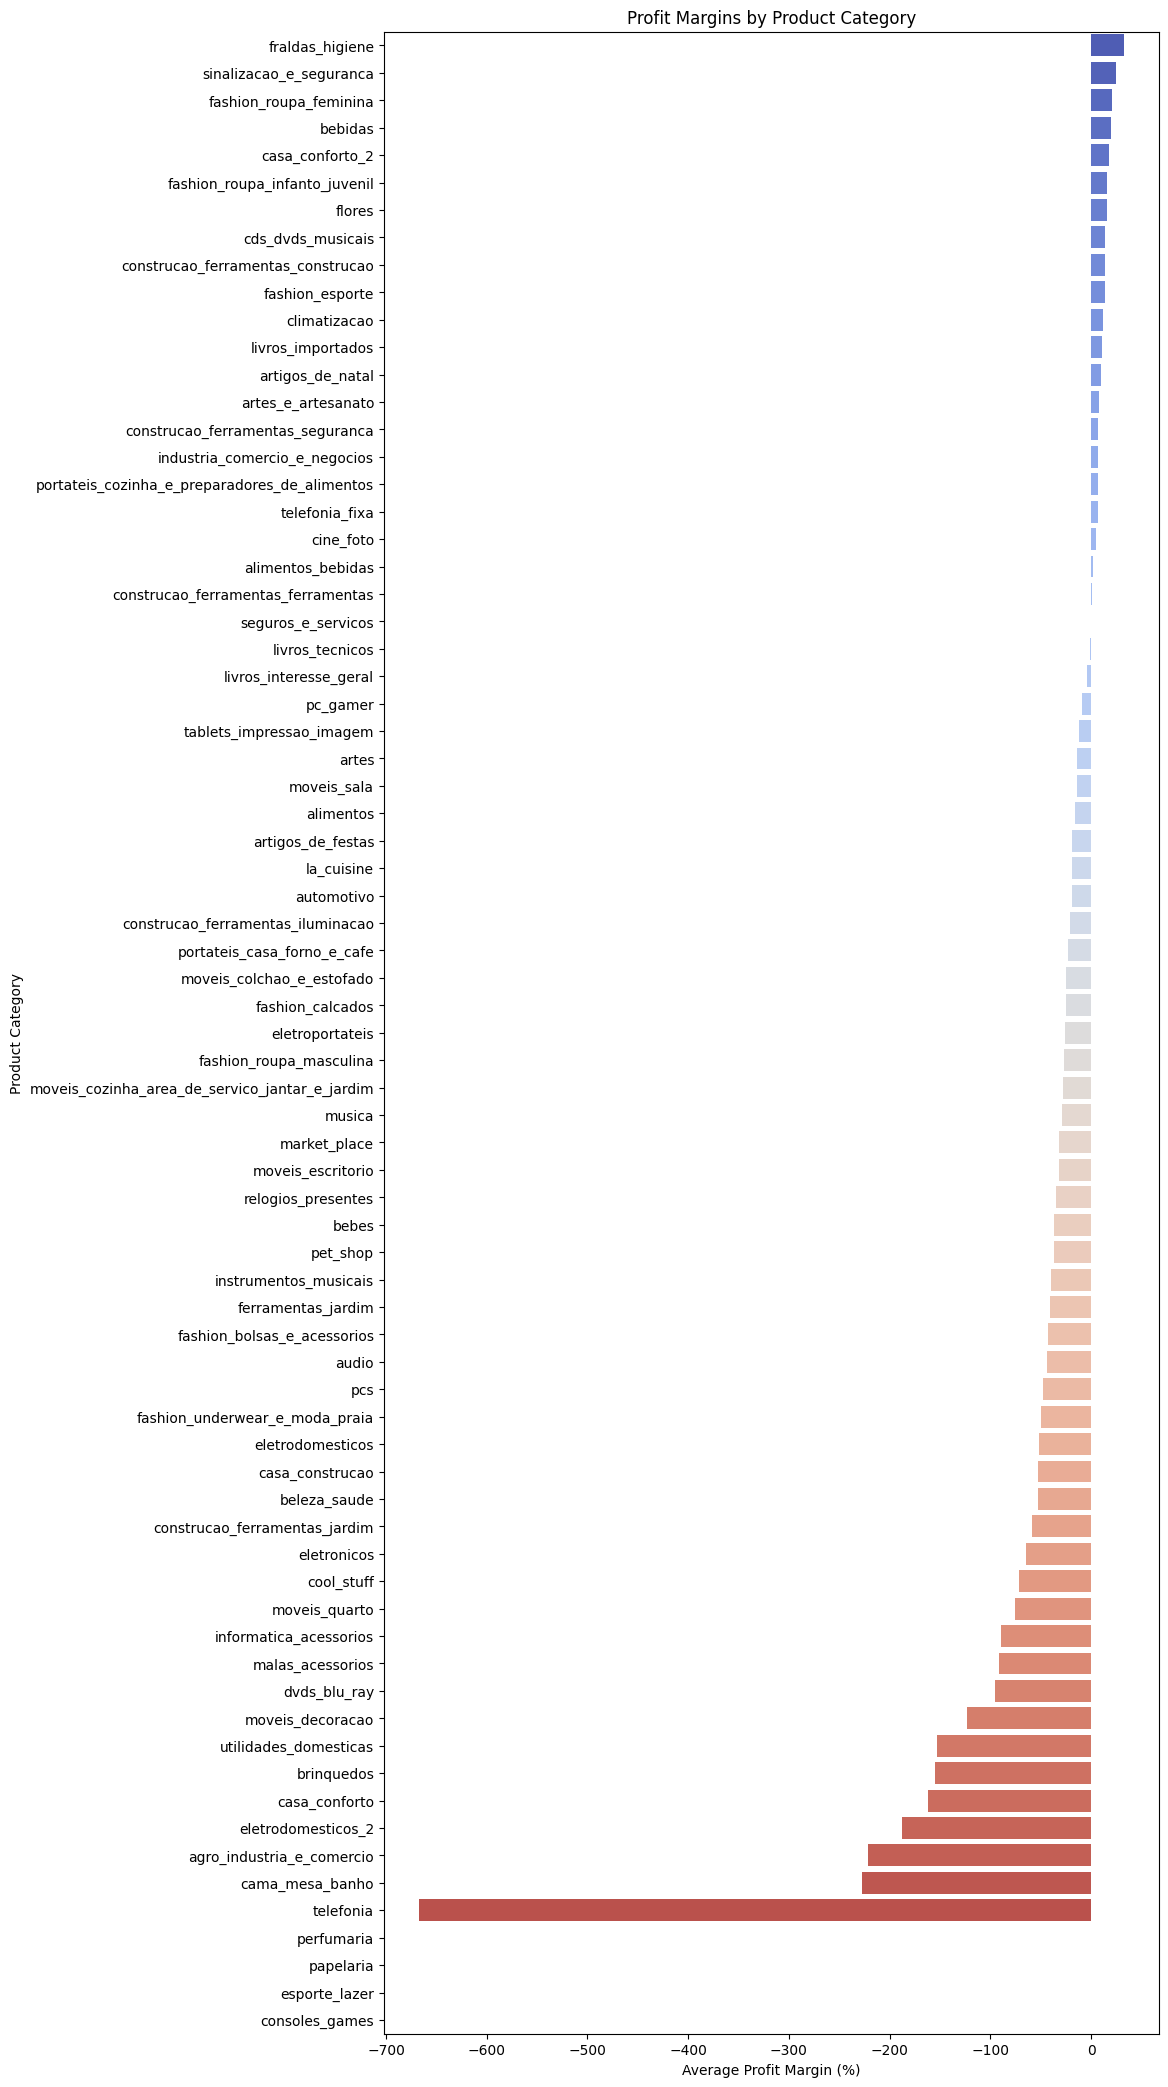

In [95]:
data['profit_margin'] = (data['profit'] / data['payment_value']) * 100

category_profit_margin = data.groupby('product_category_name')['profit_margin'].mean().sort_values(ascending=False)

# Plotting profit margins
plt.figure(figsize=(10, 26))
sns.barplot(x=category_profit_margin.values, y=category_profit_margin.index, palette='coolwarm')
plt.title('Profit Margins by Product Category')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Product Category')
plt.show()


## **Impact of Seasonal Sales Patterns on Revenue and Profit**

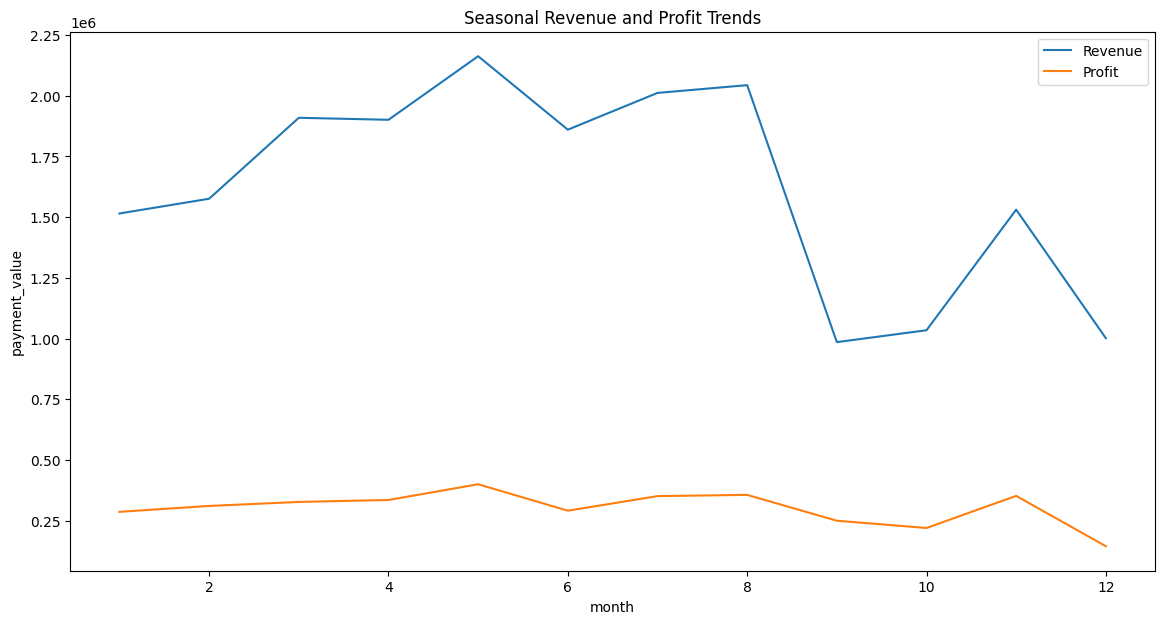

In [96]:
# Extracting month for seasonality analysis
data['month'] = data['order_purchase_timestamp'].dt.month

monthly_seasonality = data.groupby('month').agg({
    'payment_value': 'sum',
    'profit': 'sum'
}).reset_index()

# Plotting seasonality
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='payment_value', data=monthly_seasonality, label='Revenue')
sns.lineplot(x='month', y='profit', data=monthly_seasonality, label='Profit')
plt.title('Seasonal Revenue and Profit Trends')
plt.show()


### Top-Performing Products in Terms of Revenue and Profit

<ipython-input-97-6b61acc8993a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products['profit'], y=top_products['product_category_name'], palette='magma')


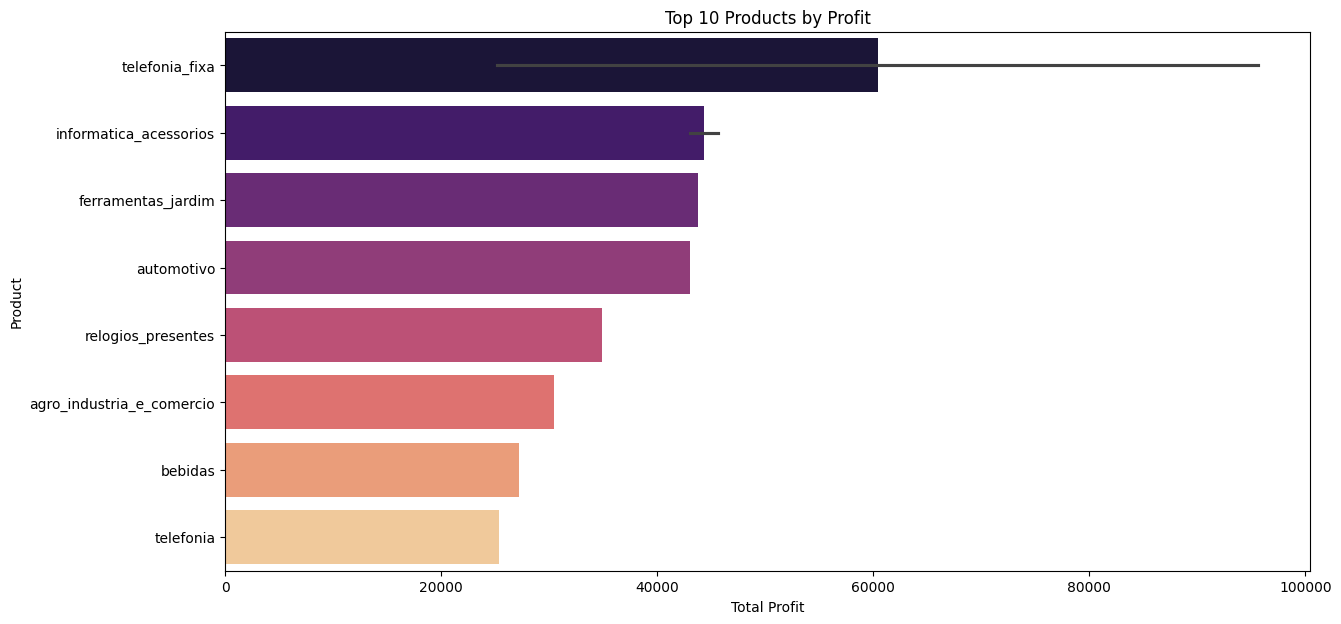

In [97]:
top_products = data.groupby('product_id').agg({
    'payment_value': 'sum',
    'profit': 'sum'
}).sort_values(by='profit', ascending=False).head(10)

# Plotting top products
top_products = pd.merge(top_products, products[['product_id', 'product_category_name']], on='product_id')

plt.figure(figsize=(14, 7))
sns.barplot(x=top_products['profit'], y=top_products['product_category_name'], palette='magma')
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()


In [98]:
df = pd.read_csv('/content/olist_products_dataset.csv')

In [99]:
df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Insight Report

1. Overall Financial Performance:

Total Revenue: The total revenue generated during the analyzed period is $19,530,503.34.

Total Profit: The overall profit is $3,632,313.46.

2. Monthly Revenue and Profit Analysis:

Peak Month (Revenue & Profit):

November 2017 recorded the highest revenue of $1,530,815.84 and the highest profit of $352,735.86. This spike suggests that November could be a critical month for sales, possibly due to events like Black Friday or other holiday-related promotions.

Lowest Month (Revenue & Profit):

December 2016 had the lowest recorded revenue of $19.62 and $0.00 profit. This could be due to data collection starting late in December or an anomaly, but it highlights the importance of understanding seasonal patterns and the need to investigate potential data gaps or unusual activity.

3. Top Product Categories by Profit

The top 10 product categories contributed significantly to the overall profit. The leading categories are:

Informatica Acessorios: Generated the highest profit of $480,586.43.
Moveis Decoracao: Close behind with a profit of $471,342.78.
Cama Mesa Banho: Also performed well with a profit of $400,135.05.
These categories seem to be high-value areas where the company may focus more on marketing and inventory.

4. Top Individual Products by Profit
The top 10 individual products by profit reveal key items driving sales:

Telefonia_fixa: The highest contributing product with a profit of $95,648.56.
Informatica_acessorios: A significant contributor with $45,584.94 profit.
Ferramentas_jardim: Added $43,769.32 to the overall profit.

These products should be prioritized for inventory and promotion, as they are major profit drivers.

Key Recommendations:

Focus on November Promotions: Considering November 2017's performance, special promotional strategies could be intensified during this month to maximize revenue and profit.

Product Category Investment: Increased investment in the top-performing categories like Informatica Acessorios and Moveis Decoracao could yield substantial returns.

Monitor and Analyze Low-Performing Periods: The significant drop in December 2016 suggests the need for better seasonal analysis or addressing potential data inconsistencies.

Maximize Top Products: The top individual products generating the most profit should be central to inventory planning and marketing efforts to maintain or improve their profitability.

